In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib

In [3]:
# load apple stock data
Apple=pd.read_csv("../data/finance/AAPL.csv")
Amazon=pd.read_csv("../data/finance/AMZN.csv")
Google=pd.read_csv("../data/finance/GOOG.csv")
microsoft=pd.read_csv("../data/finance/MSFT.csv")
meta=pd.read_csv("../data/finance/META.csv")
nvidia=pd.read_csv("../data/finance/NVDA.csv")

In [4]:
Apple.head()

,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [6]:


# Moving Averages
Apple["SMA_20"] = talib.SMA(Apple["Close"], timeperiod=20)
Apple["SMA_50"] = talib.SMA(Apple["Close"], timeperiod=50)

# RSI
Apple["RSI_14"] = talib.RSI(Apple["Close"], timeperiod=14)
# MACD
Apple["MACD"], Apple["MACD_Signal"], Apple["MACD_Hist"] = talib.MACD(
    Apple["Close"],
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

In [7]:
Apple["SMA_20"] = talib.SMA(Apple["Close"], timeperiod=20)
Apple["RSI_14"] = talib.RSI(Apple["Close"], timeperiod=14)
Apple["MACD"], Apple["MACD_Signal"], Apple["MACD_Hist"] = talib.MACD(
	Apple["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

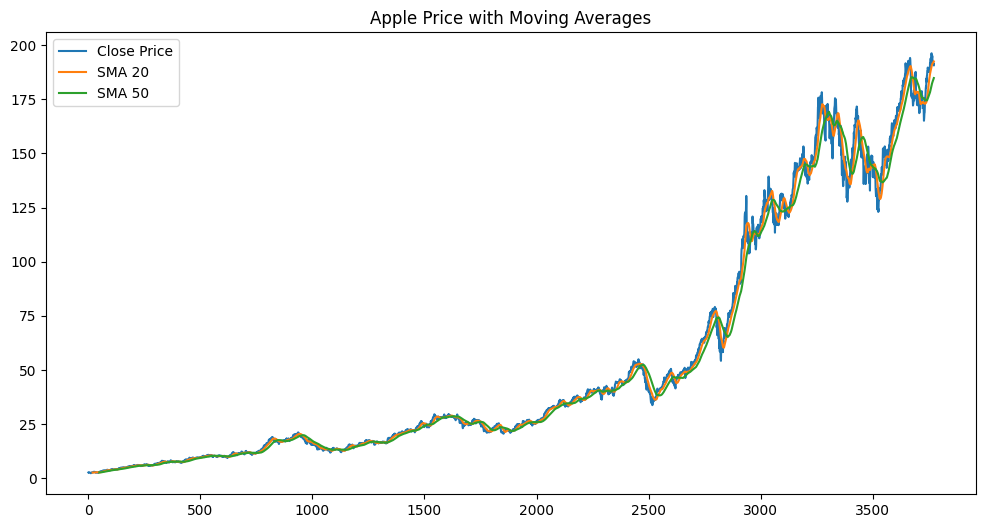

In [8]:
plt.figure(figsize=(12,6))
plt.plot(Apple["Close"], label="Close Price")
plt.plot(Apple["SMA_20"], label="SMA 20")
plt.plot(Apple["SMA_50"], label="SMA 50")
plt.legend()
plt.title("Apple Price with Moving Averages")
plt.show()

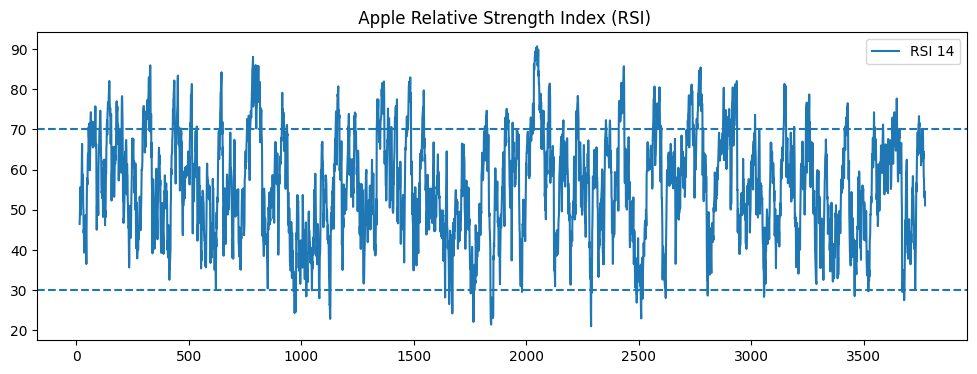

In [9]:
plt.figure(figsize=(12,4))
plt.plot(Apple["RSI_14"], label="RSI 14")
plt.axhline(70, linestyle="--")
plt.axhline(30, linestyle="--")
plt.legend()
plt.title(" Apple Relative Strength Index (RSI)")
plt.show()

c:\Users\User\Desktop\KAIM\project\NovaFinancialSolutions\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


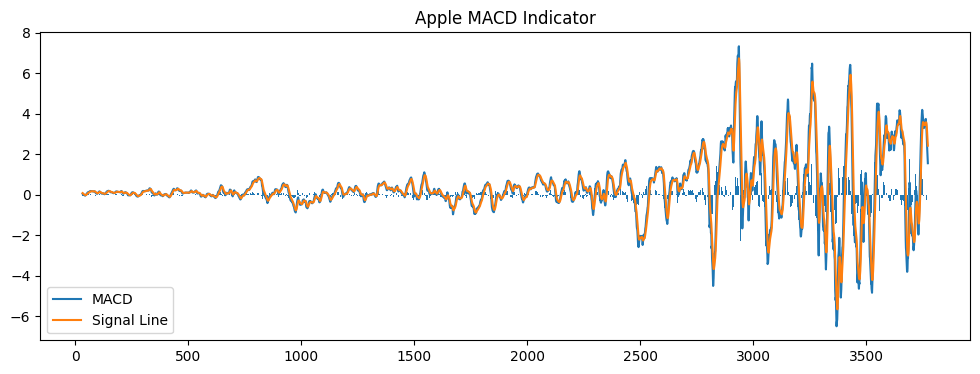

In [10]:
plt.figure(figsize=(12,4))
plt.plot(Apple["MACD"], label="MACD")
plt.plot(Apple["MACD_Signal"], label="Signal Line")
plt.bar(Apple.index, Apple["MACD_Hist"])
plt.legend()
plt.title("Apple MACD Indicator")
plt.show()